In [ ]:
import pandas as pd
import numpy as np

from lib.feature_eng import find_class_columns, create_iv_pivot_table_with_binning
from lib.charts_config import plot_woe_iv

## Extraição de dados usando Kaggle CLI


In [ ]:
%%bash
mkdir -p data && \
cd data && \ 
kaggle competitions download -c home-credit-credit-risk-model-stability && \
unzip home-credit-credit-risk-model-stability.zip && \
rm -rf parquet_files \

## Seleção de arquivos relacionados com as classes escolhidas

In [ ]:
train_depth_0 = ['train_static_0_0', 'train_static_0_1','train_static_cb_0']
train_depth_1 = [
  'train_applprev_1_0', 'train_applprev_1_1','train_other_1', 'train_tax_registry_a_1', 
  'train_tax_registry_b_1', 'train_tax_registry_c_1', 'train_credit_bureau_a_1_0', 
  'train_credit_bureau_a_1_1', 'train_credit_bureau_a_1_2', 'train_credit_bureau_a_1_3', 
  'train_credit_bureau_b_1', 'train_deposit_1', 'train_person_1', 'train_debitcard_1',
]
train_depth_2 = [
  'train_applprev_2', 'train_person_2', 'train_credit_bureau_a_2_0', 'train_credit_bureau_a_2_1',
  'train_credit_bureau_a_2_2', 'train_credit_bureau_a_2_3', 'train_credit_bureau_a_2_4',
  'train_credit_bureau_a_2_5', 'train_credit_bureau_a_2_6', 'train_credit_bureau_a_2_7',
  'train_credit_bureau_a_2_8', 'train_credit_bureau_a_2_9', 'train_credit_bureau_a_2_10',
  'train_credit_bureau_b_2',
]

classes_list = [
  'amount_416A', 'amtdepositbalance_4809441A','amtdepositincoming_4809444A', 'amtdepositoutgoing_4809442A',
  'amtinstpaidbefduel24m_4187115A', 'days360_512L','maxdpdlast12m_727P',
  'birthdate_87D', 'cntpmts24_3658933L', 'credacc_actualbalance_314A','credacc_maxhisbal_375A', 'credacc_minhisbal_90A',
  'currdebt_22A', 'currdebtcredtyperange_828A', 'contractsum_5085717L', 'downpmt_116A', 'education_88M',
  'for3years_128L', 'gender_992L', 'downpmt_134A'
]

depth_0_occurrences = find_class_columns(feature_cols=classes_list, file_list=train_depth_0)
depth_1_occurrences = find_class_columns(feature_cols=classes_list, file_list=train_depth_1)
depth_2_occurrences = find_class_columns(feature_cols=classes_list, file_list=train_depth_2)

# Dicionarios com arquivos e suas respectivas colunas (classes)
print(f'depth_0 = {depth_0_occurrences}') 
print(f'depth_1 = {depth_1_occurrences}')
print(f'depth_2 = {depth_2_occurrences}')

## Pré-processamento dos dados selecionados

In [ ]:
df_base_info = pd.read_csv('data/csv_files/train/train_base.csv', usecols=['case_id', 'target'])
df_static_0_0 ='data/csv_files/train/train_static_0_0.csv'
df_static_0_1 ='data/csv_files/train/train_static_0_1.csv'
df_static_cb_0 = 'data/csv_files/train/train_static_cb_0.csv'

# df = pd.read_csv(df_static_0_0)
# df
# df_base_info

### Variável : `cntpmts24_3658933L`

Descrição : Quantidade de meses com qualquer recebimento (renda)

Classe IV : 0.013

In [ ]:
cls = 'cntpmts24_3658933L'

df_class_cmt = create_iv_pivot_table_with_binning(df_base_info, df_static_0_0, cls, num_bins=20)
print(df_class_cmt["iv"].sum())
df_class_cmt  

In [ ]:
# Data Vizualization
plot_woe_iv(df_class_cmt, cls, rotation_X=90)

### Variável : `amtinstpaidbefduel24m_4187115A`

Descrição : Número de parcelas pagas antes do vencimento nos últimos 24 meses

Classe IV : 0,031

In [22]:
# Create pivot table for WOE info
cls = 'amtinstpaidbefduel24m_4187115A'
df_class_amt = create_iv_pivot_table_with_binning(df_base_info, df_static_0_0, cls, num_bins=20)

# Create dummy variables
df_base_class_amt = pd.read_csv(df_static_0_0, usecols=['case_id', cls])


# Checking data
print(df_class_amt["iv"].sum())
df_class_amt

/home/viriato/Documents/repos/credit_risk_model/lib/feature_eng.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merged.groupby(f"{cls}_binned")["target"]


0.0310518657179662


target,Bin_Range,Non_Default,Default,non_events,events,woe,iv
0,0-3249,1034080,34584,0.699334,0.720590,-0.029943,0.000636
1,3249-12413,72838,3493,0.049259,0.072780,-0.390342,0.009181
2,12413-23746,73641,2691,0.049802,0.056070,-0.118530,0.000743
3,23746-39755,74111,2222,0.050120,0.046297,0.079337,0.000303
4,39755-64963,74423,1910,0.050331,0.039797,0.234843,0.002474
5,64963-114201,74605,1728,0.050454,0.036005,0.337424,0.004876
6,114201-992476,74967,1366,0.050699,0.028462,0.577342,0.012838


In [ ]:
# Data Vizualization
plot_woe_iv(df_class_amt, cls, rotation_X=90)

### Variável : `currdebt_22A`

Descrição : Atual total de debido do cliente 

Classe IV : 0,002

In [ ]:
cls = 'currdebt_22A'
# df_class_curr = create_pivot_table(df_base_info, df_static_0_0, cls, )
df_class_curr = create_iv_pivot_table_with_binning(df_base_info, df_static_0_0, cls, num_bins=20)

print(df_class_curr["iv"].sum())

df_class_curr

In [ ]:
# Data Vizualization
plot_woe_iv(df_class_curr, cls, rotation_X=90)

### Variável : `maxdpdlast12m_727P`

Descrição : Maximum days past due in the past 12 months.

Classe IV : 0,12

In [31]:
cls = 'maxdpdlast12m_727P'
# df_class_max_dpd_year = create_pivot_table(df_base_info, df_static_0_0, cls, )
df_class_max_dpd_year = create_iv_pivot_table_with_binning(df_base_info, df_static_0_0, cls, num_bins=40)

print(df_class_max_dpd_year["iv"].sum())

df_class_max_dpd_year

0.1128218612444349


/home/viriato/Documents/repos/credit_risk_model/lib/feature_eng.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merged.groupby(f"{cls}_binned")["target"]


target,Bin_Range,Non_Default,Default,non_events,events,woe,iv
0,0-1,1348302,39198,0.911837,0.816727,0.110157,0.010477
1,1-2,27524,996,0.018614,0.020753,-0.108753,0.000233
2,2-4,32965,1444,0.022294,0.030087,-0.299790,0.002336
3,4-11,37911,2296,0.025639,0.047839,-0.623746,0.013848
4,11-4430,31963,4060,0.021616,0.084594,-1.364423,0.085928


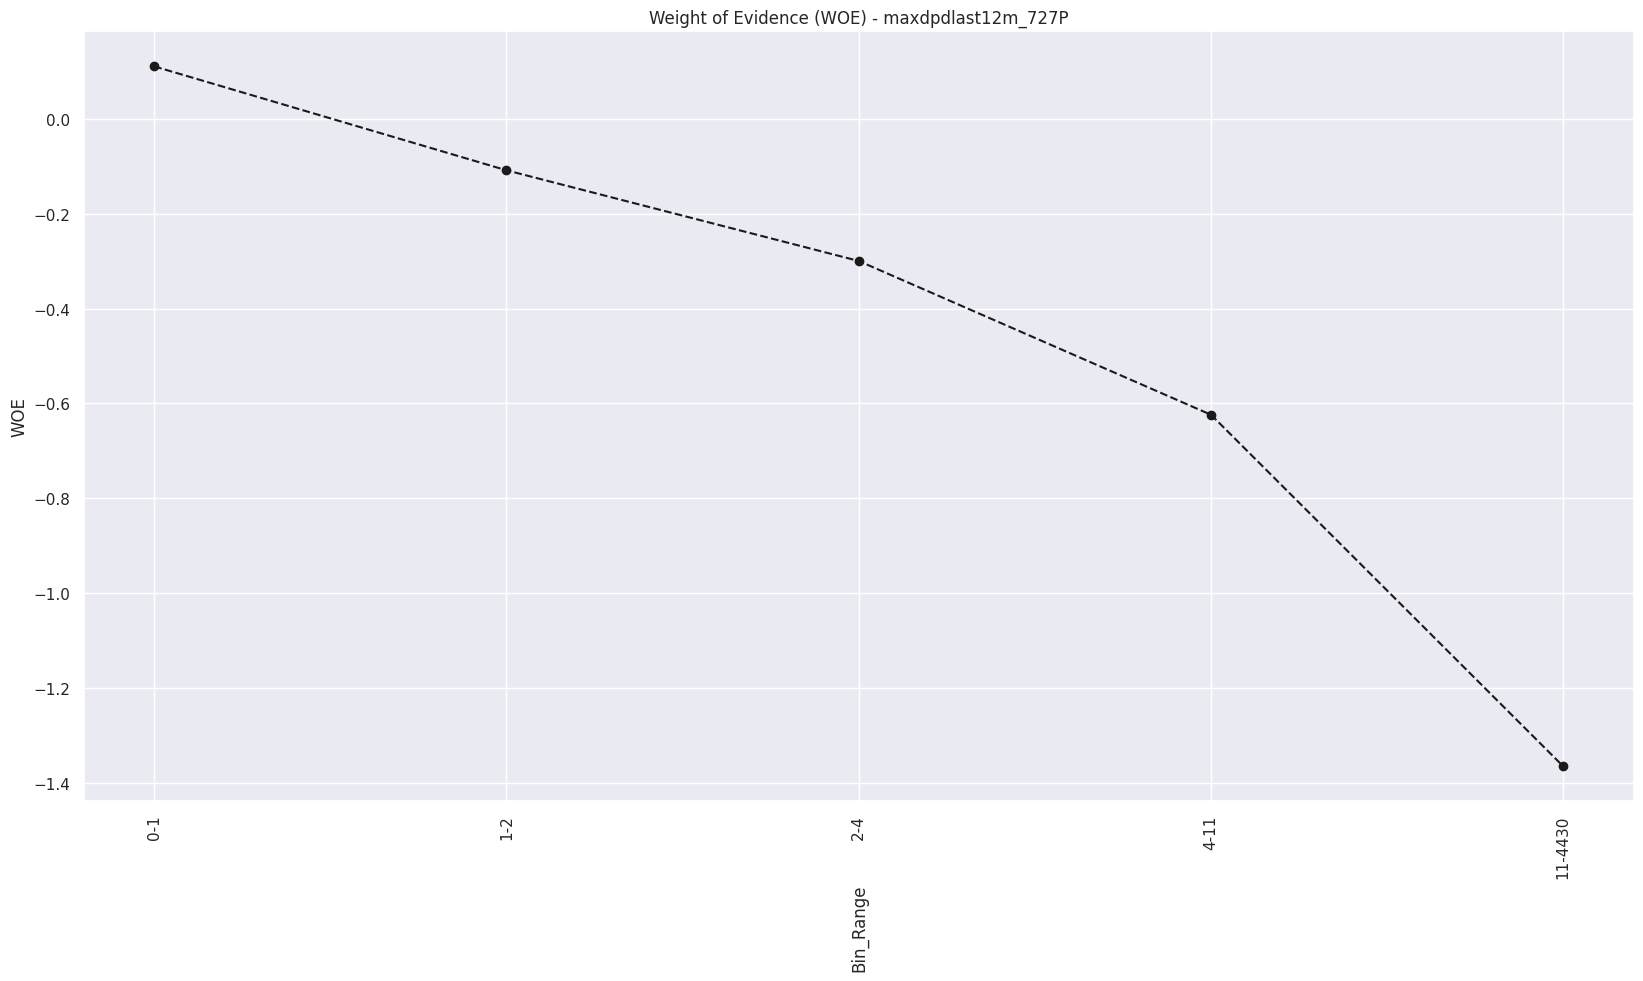

In [32]:
# Data Vizualization
plot_woe_iv(df_class_max_dpd_year, cls, rotation_X=90)

### Variável : `contractssum_5085716L`

Descrição : Soma total de valores de contratos recuperados de bureau de crédito externo

Classe IV : 0,021

In [ ]:
cls = 'contractssum_5085716L'
df_class_retrieved_contracts = create_iv_pivot_table_with_binning(df_base_info, df_static_cb_0, cls, num_bins=2000)

print(df_class_retrieved_contracts["iv"].sum())

df_class_retrieved_contracts

In [ ]:
# Data Vizualization
plot_woe_iv(df_class_retrieved_contracts, cls, rotation_X=90)

### Variável : `downpmt_116A`

Descrição : Valor da entrada

Classe IV : 0,0067

In [ ]:
cls = 'downpmt_116A'
df_class_downpay = create_iv_pivot_table_with_binning(df_base_info, df_static_0_0, cls, num_bins=2000)

print(df_class_downpay["iv"].sum())

df_class_downpay

In [ ]:
# Data Vizualization
plot_woe_iv(df_class_downpay, cls, rotation_X=90)